<a href="https://www.kaggle.com/aellatif/fake-newspaper-detection-with-liwc-dictionary?scriptVersionId=83095358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install liwc

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import tensorflow as tf
from collections import Counter
from itertools import chain
from collections import Counter
import seaborn as sns
import joblib
from scipy import interp
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import liwc
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from nltk import ne_chunk, pos_tag, word_tokenize, sent_tokenize

# Read LIWC dictionary 

Ref: https://mcrc.journalism.wisc.edu/files/2018/04/Manual_LIWC.pdf

### The lexicon data can be acquired (purchased) from liwc.net.



In [3]:
liwcPath = r'../input/liwc2015/LIWC2015 Dictionary.dic'
parse, category_names = liwc.load_token_parser(liwcPath)

# read csv 

#### dataset links


1. https://www.kaggle.com/c/fake-news
2. https://www.kaggle.com/jruvika/fake-news-detection
3. https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [4]:
import pandas as pd
df1=pd.read_csv(r'../input/fake-dataset/Fake.csv')
df1['label']=0
df2=pd.read_csv(r'../input/fake-dataset/True.csv')
df2['label']=1

# 1 data set
df3=pd.read_csv(r'../input/dataset2/test.csv')
df3['label']=pd.read_csv('../input/lables/final_sub.csv').label.values
df4=pd.read_csv(r'../input/dataset2/train.csv')
# 2 dataset 


df5=pd.read_csv(r'../input/dataset-1/data.csv')
#3 dataset




# processing data

In [5]:
df_fake_ds=pd.concat([df1,df2]).drop(['title','subject','date'],axis=1)

In [6]:
df_fake_ds['label']=df_fake_ds['label'].astype(int)

In [7]:
df_fake_ds

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [8]:
df_fake_ds1=pd.concat([df3,df4]).drop(['title','author','id'],axis=1)

In [9]:
df_fake_ds1['label']=df_fake_ds1['label'].astype(int)

In [10]:
df_fake_ds1

,text,label
0,"PALO ALTO, Calif. — After years of scorning...",0
1,Russian warships ready to strike terrorists ne...,1
2,Videos #NoDAPL: Native American Leaders Vow to...,1
3,"If at first you don’t succeed, try a different...",0
4,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [11]:
df_fake_ds2=df5.drop(['URLs','Headline'],axis=1).rename({'Body':'text','Label':'label'},axis=1)

In [12]:
df_fake_ds2['label']=df_fake_ds2['label'].astype(int)

In [13]:
df_fake_ds2

,text,label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1
...,...,...
4004,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,NaN,0
4007,SHANGHAI (Reuters) - China said it plans to ac...,1


In [14]:
fake_news_Df=pd.concat([df_fake_ds,df_fake_ds1,df_fake_ds2])

In [15]:
fake_news_Df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
4004,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,NaN,0
4007,SHANGHAI (Reuters) - China said it plans to ac...,1


In [16]:
fake_news_Df = fake_news_Df[['text','label']].dropna()
fake_news_Df.reset_index(inplace = True)

In [17]:
fake_news_Df.shape

(74840, 3)

In [18]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : wordopt(x))

In [20]:
fake_news_Df['text']

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday  it was revealed that former milwauk...
3        on christmas day  donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
74835    vietnam is in great danger  you must publish a...
74836    trends to watch   of readers think this story ...
74837    trump jr  is soon to give a  minute speech for...
74838    shanghai  reuters    china said it plans to ac...
74839    vice president mike pence leaves nfl game beca...
Name: text, Length: 74840, dtype: object

### Stopword Removal

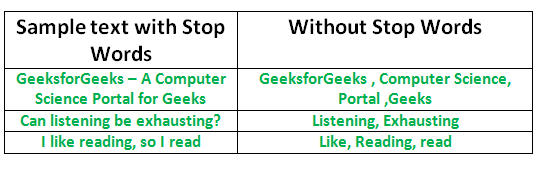

Ref:https://www.google.com.tr/url?sa=i&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fremoving-stop-words-nltk-python%2F&psig=AOvVaw2BVMU7sjLZuP8gjAVe52T9&ust=1640182574752000&source=images&cd=vfe&ved=0CAwQjhxqFwoTCKiB_q-K9fQCFQAAAAAdAAAAABAD

In [21]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [22]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [23]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : remove_eng_stopwords(x))

In [24]:
fake_news_Df

,index,text,label
0,0,donald trump wish americans happy new year lea...,0
1,1,house intelligence committee chairman devin nu...,0
2,2,friday revealed former milwaukee sheriff david...,0
3,3,christmas day donald trump announced would bac...,0
4,4,pope francis used annual christmas day message...,0
...,...,...,...
74835,4003,vietnam great danger must publish tell army go...,0
74836,4004,trends watch readers think story fact add two ...,0
74837,4005,trump jr soon give minute speech readers think...,0
74838,4007,shanghai reuters china said plans accept data ...,1


## Lemmatization

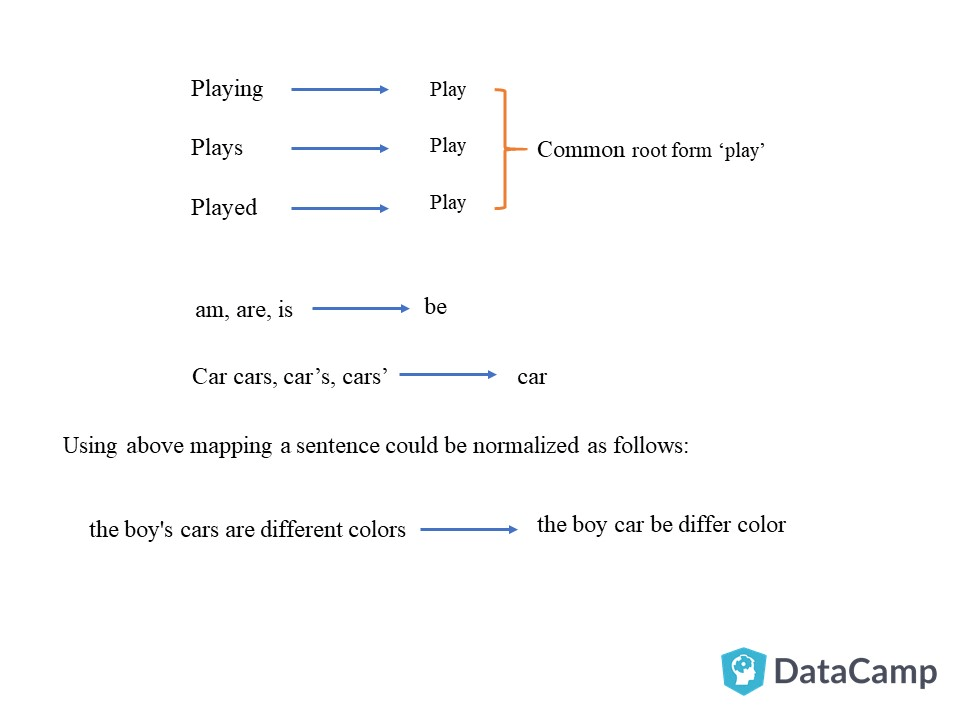

Ref:https://www.google.com.tr/url?sa=i&url=https%3A%2F%2Fwww.datacamp.com%2Fcommunity%2Ftutorials%2Fstemming-lemmatization-python&psig=AOvVaw0MT_p4g76LhbGwtIbyPBve&ust=1640183270141000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJi7qPyM9fQCFQAAAAAdAAAAABAD

## Lemmatization: Lemmatization kelimeleri morfolojik olarak inceler. Bir örnek olarak: “Gidiyorlar” gitmek fiilinin üçüncü çoğul şahsının geniş zamanda çekiminden oluşur. Burada kelimenin çekimlenmemiş ilk haline lemma denir, bu örnekte gitmek bir lemmadır. Lemmatization algoritmaları çalışmak için bir sözlüğe ihtiyaç duyar. Aynı şekilde ingilizcede bir örnek verirsek “Feeds”, feed fiilinin üçüncü tekil şahsının geniş zamanda çekimlenmiş halidir.
## NLTK kütüphanesinde WordNetLemmatizer’la kelimelerin lemma’ları bulunabilir.

In [25]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [26]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : word_lemmatizer(x))

In [27]:
fake_news_Df['text']

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
74835    vietnam great danger must publish tell army go...
74836    trend watch reader think story fact add two ce...
74837    trump jr soon give minute speech reader think ...
74838    shanghai reuters china said plan accept data o...
74839    vice president mike penny leaf nfl game anti a...
Name: text, Length: 74840, dtype: object

In [28]:
Word_STOPWORDS = ["e", "te", "i", "me", "qe", "ne", "nje", "a", "per", "sh", "nga", "ka", "u", "eshte", "dhe", "shih", "nuk",
             "m", "dicka", "ose", "si", "shume", "etj", "se", "pa", "sipas", "s", "t", "dikujt", "dike", "mire", "vet",
             "bej", "ai", "vend", "prej", "ja", "duke", "tjeter", "kur", "ia", "ku", "ta", "keq", "dy", "ben", "bere",
             "behet", "dickaje", "edhe", "madhe", "la", "sa", "gjate", "zakonisht", "pas", "veta", "mbi", "disa", "iu",
             "mos", "c", "para", "dikush", "gje", "be", "pak", "tek", "fare", "beri", "po", "bie", "k", "do", "gjithe",
             "vete", "mund", "kam", "le", "jo", "beje", "tij", "kane", "ishte", "jane", "vjen", "ate", "kete", "neper",
             "cdo", "na", "marre", "merr", "mori", "rri", "deri", "b", "kishte", "mban", "perpara", "tyre", "marr",
             "gjitha", "as", "vetem", "nen", "here", "tjera", "tjeret", "drejt", "qenet", "ndonje", "nese", "jap",
             "merret", "rreth", "lloj", "dot", "saj", "nder", "ndersa", "cila", "veten", "ma", "ndaj", "mes", "ajo",
             "cilen", "por", "ndermjet", "prapa", "mi", "tere", "jam", "ashtu", "kesaj", "tille", "behem", "cilat",
             "kjo", "menjehere", "ca", "je", "aq", "aty", "prane", "ato", "pasur", "qene", "cilin", "teper", "njera",
             "tej", "krejt", "kush", "bejne", "ti", "bene", "midis", "cili", "ende", "keto", "kemi", "sic", "kryer",
             "cilit", "atij", "gjithnje", "andej", "siper", "sikur", "ketej", "ciles", "ky", "papritur", "ua",
             "kryesisht", "gjithcka", "pasi", "kryhet", "mjaft", "ketij", "perbashket", "ata", "atje", "vazhdimisht",
             "kurre", "tone", "keshtu", "une", "sapo", "rralle", "vetes", "ishin", "afert", "tjetren", "ketu", "cfare",
             "to", "anes", "jemi", "asaj", "secila", "kundrejt", "ketyre", "pse", "tilla", "mua", "nepermjet", "cilet",
             "ndryshe", "kishin", "ju", "tani", "atyre", "dic", "yne", "kudo", "sone", "sepse", "cilave", "kem", "ty",
             "t'i", "nbsp", "tha", "re", "the","jr","t"]
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
text_unknows= Word_STOPWORDS
stop.update(text_unknows)

In [29]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [30]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : denoise_text(x))

In [31]:
fake_news_Df['text']

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
74835    vietnam great danger must publish tell army go...
74836    trend watch reader think story fact add two ce...
74837    trump soon give minute speech reader think sto...
74838    shanghai reuters china said plan accept data o...
74839    vice president mike penny leaf nfl game anti a...
Name: text, Length: 74840, dtype: object

In [32]:
fake_news_Df['text']=fake_news_Df['text'].astype(str)

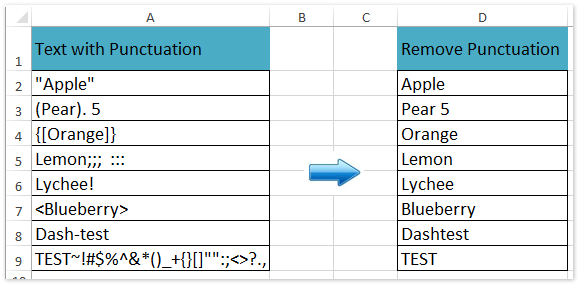

Ref:https://www.google.com.tr/url?sa=i&url=https%3A%2F%2Fwww.extendoffice.com%2Fdocuments%2Fexcel%2F3296-excel-remove-all-punctuation.html&psig=AOvVaw3MbjzjUgx2zaamqjDQHxhd&ust=1640183372787000&source=images&cd=vfe&ved=0CAwQjhxqFwoTCPCB5KyN9fQCFQAAAAAdAAAAABAD

In [33]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
fake_news_Df['text'] = fake_news_Df['text'].apply(punctuation_removal)

## Using LIWC dictionary to extract features

In [34]:
fake_news_Df

,index,text,label
0,0,donald trump wish american happy new year leav...,0
1,1,house intelligence committee chairman devin nu...,0
2,2,friday revealed former milwaukee sheriff david...,0
3,3,christmas day donald trump announced would bac...,0
4,4,pope francis used annual christmas day message...,0
...,...,...,...
74835,4003,vietnam great danger must publish tell army go...,0
74836,4004,trend watch reader think story fact add two ce...,0
74837,4005,trump soon give minute speech reader think sto...,0
74838,4007,shanghai reuters china said plan accept data o...,1


In [37]:
fake_news_Df

,index,text,label
0,0,donald trump wish american happy new year leav...,0
1,1,house intelligence committee chairman devin nu...,0
2,2,friday revealed former milwaukee sheriff david...,0
3,3,christmas day donald trump announced would bac...,0
4,4,pope francis used annual christmas day message...,0
...,...,...,...
74835,4003,vietnam great danger must publish tell army go...,0
74836,4004,trend watch reader think story fact add two ce...,0
74837,4005,trump soon give minute speech reader think sto...,0
74838,4007,shanghai reuters china said plan accept data o...,1


<AxesSubplot:>

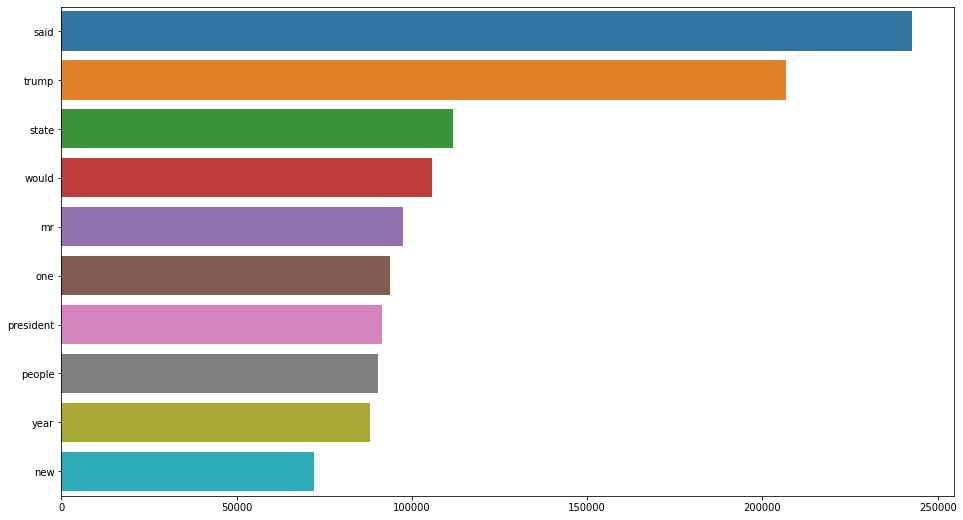

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:n]

plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(fake_news_Df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

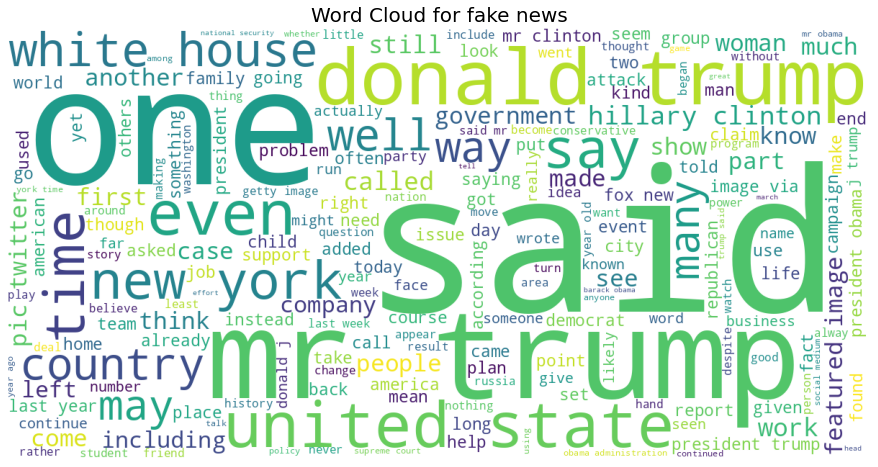

In [44]:
from wordcloud import WordCloud, STOPWORDS
sw = set(STOPWORDS)

fake_news = fake_news_Df[fake_news_Df.label == 0]
real_news = fake_news_Df[fake_news_Df.label == 1]

# wordcloud for fake news
fake_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(fake_news.text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(fake_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for fake news', fontsize=20);

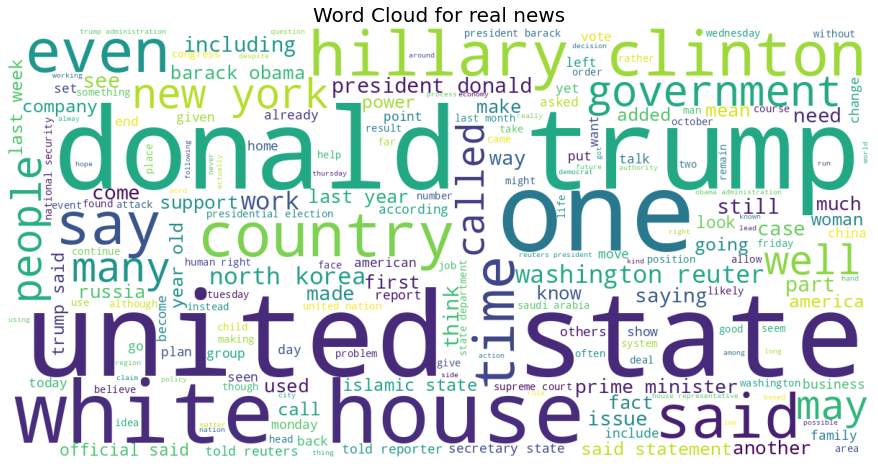

In [45]:
# wordcloud for real news
real_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(real_news.text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(real_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for real news', fontsize=20);

In [ ]:
corpus = []
words = []

for i in range(0,len(fake_news_Df)):
    review = re.sub('[^a-zA-Z0-9]',' ',fake_news_Df['text'][i])
    review = review.lower()
    review = review.split() 
    review = list(category for token in review for category in parse(token))
    statements = ' '.join(review)
    corpus.append(statements)
    words.append(review)

## TfidfVectorizer method 

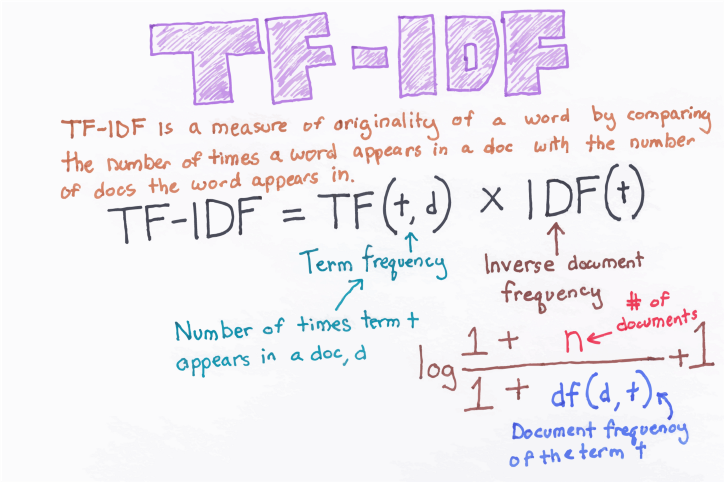

RF:https://ichi.pro/tr/tf-idf-vectorizer-scikit-learn-241618289070362

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_fit=vectorizer.fit(corpus)

In [ ]:
X_transformed=X_fit.transform(corpus)

In [ ]:
features = vectorizer.get_feature_names()
df_count = pd.DataFrame(X_transformed.toarray(),columns = features)
df_count

# Split data to train and test

In [ ]:
x=X_transformed

In [ ]:
y=fake_news_Df['label']

In [ ]:
x

In [ ]:
counter = Counter(y)
print(counter)

In [ ]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# classifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['svm'] = LinearSVC(random_state=0, tol=1e-5)
    models['NN']=MLPClassifier()
    return models
def get_models2():
    models = dict()
    models['RF']=RandomForestClassifier(criterion='gini')
    clf1 =LogisticRegression()
    clf2 = RandomForestClassifier()
    clf3 = KNeighborsClassifier()
    clf4= LinearSVC()
    clf5=DecisionTreeClassifier(criterion='entropy',random_state=150,splitter='random')
    models['VC1']=VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], weights=[2,1,1],flatten_transform=True)
    models['VC2']=VotingClassifier(estimators=[('lr', clf1), ('svm', clf4), ('cart', clf5)], weights=[2,1,1],flatten_transform=True)
    models['BG']=BaggingClassifier(base_estimator=clf5,n_estimators=10, random_state=0)#
    models['BG1']=BaggingClassifier(base_estimator=clf5,n_estimators=10, random_state=0)
    models['Ada']=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=None)
    models['XGB']=XGBClassifier()
    return models
#https://scholar.google.com/scholar?q=Arenas-Garc%C3%ADa+J+P%C3%A9rez-Cruz+F+Multi-class+support+vector+machines:+A+new+approach+2+Proceeding+of+the+IEEE+International+Conference+on+Accoustics,+Speech,+and+Signal+Processing+(ICASSP+%E2%80%9903)+April+2003+781+784+2-s2.0-17644442381+
def get_models3():
    models = dict()
    models['svm'] = LinearSVC(C=70.01)
    return models

#### BaggingClassifier
### Bagging meta-estimator, hem sınıflandırma (BaggingClassifier) hem de regresyon (BaggingRegressor) problemleri için kullanılabilen bir algoritmadır. Tahmin yapmak için tipik torbalama tekniğini izler. Torbalama meta-estimator algoritması için adımlar şunlardır: Rastgele alt kümeleri orijinal veri kümesinden oluşturulur.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def eval_confusion(y_pred, y_true):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'matrix': conf_matrix, 'precision': precision, 'recall': recall, 'f1': f1}

In [ ]:
# evaluate each model on the training set

for clf_name, clf in get_models2().items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = eval_confusion(y_pred, y_test)
    print("{}:".format(clf_name))
    print(conf['matrix'])
    print("precision: {}".format(conf['precision']))
    print("recall: {}".format(conf['recall']))
    print("f1-score: {}".format(conf['f1']))
    print("accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print()

In [ ]:
hhh

# hyperparameter

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
SVCpipe = LinearSVC()

# Gridsearch to determine the value of C
param_grid = {'C':np.arange(0.01,100,10)}

lsvm_randomized_search = RandomizedSearchCV(SVCpipe, param_grid, n_iter=5, scoring='f1',
                                           cv=5, verbose=2, random_state=42)
lsvm_randomized_search.fit(X_train, y_train)

In [ ]:
lsvm_randomized_search.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV

# fine-tune MLP classifier
mlp_best = MLPClassifier()
mlp_param_grid = {
    'hidden_layer_sizes': [(16,), (16, 16), (32,),(32,32),(64,32,16)],
    'activation': ['relu', 'tanh', 'logistic']
}

mlp_grid_search = GridSearchCV(mlp_best, mlp_param_grid, 'f1', cv=5, verbose=2)
mlp_grid_search.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

logistic_best = LogisticRegression()
logistic_param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': scipy.stats.reciprocal(20, 1000),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logistic_randomized_search = RandomizedSearchCV(logistic_best, logistic_param_dist, n_iter=5, scoring='f1',
                                           cv=5, verbose=2, random_state=42)
logistic_randomized_search.fit(X_train, y_train)

In [ ]:
#List Hyperparameters that we want to tune.

random_param_dist = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1,30)),
    'p':[1,2],
}

knn_best = KNeighborsClassifier()
knn_f = RandomizedSearchCV(knn_best, random_param_dist, n_iter=5, scoring='f1',
                                           cv=5, verbose=2, random_state=42)
knn_f.fit(X_train, y_train)

In [ ]:
knn_f.best_estimator_

In [ ]:
lsvm_randomized_search.best_estimator_

In [ ]:
mlp_grid_search.best_estimator_

In [ ]:
logistic_randomized_search.best_estimator_

In [ ]:
# evaluate each model on the training set
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C=86.56900442587761, penalty='l1', solver='liblinear')
    models['knn'] = KNeighborsClassifier(leaf_size=29, n_neighbors=8, p=1)
    models['svm'] = LinearSVC(C=70.01)
    models['NN']=MLPClassifier(hidden_layer_sizes=(64, 32, 16))
    return models
for clf_name, clf in get_models().items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = eval_confusion(y_pred, y_test)
    print("{}:".format(clf_name))
    print(conf['matrix'])
    print("precision: {}".format(conf['precision']))
    print("recall: {}".format(conf['recall']))
    print("f1-score: {}".format(conf['f1']))
    print("accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print()

# Unsupervised - K Means Clustering



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #  plotting and data visualization
import seaborn as sns # improve visuals
sns.set() # Set as default style

import string # python library
import re # regex library

from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short # Preprocesssing
from gensim.models import Word2Vec # Word2vec

from sklearn import cluster # Kmeans clustering
from sklearn import metrics # Metrics for evaluation
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE #TSNE

In [ ]:
#https://www.kaggle.com/nasirkhalid24/unsupervised-k-means-clustering-fake-news-87/notebook

In [ ]:
# Training for 2 clusters (Fake and Real)
kmeans = cluster.KMeans(n_clusters=2, verbose=1,init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True, n_jobs=1)

# Fit predict will return labels
clustered = kmeans.fit_predict(X_transformed)

In [ ]:
testing_df = {'Sentence': fake_news_Df['text'], 'Labels': fake_news_Df['label'], 'Prediction': clustered}
testing_df = pd.DataFrame(data=testing_df)

testing_df.head(10)

In [ ]:
correct = 0
incorrect = 0
for index, row in testing_df.iterrows():
    if row['Labels'] == row['Prediction']:
        correct += 1
    else:
        incorrect += 1
        
print("Correctly clustered news: " + str((correct*100)/(correct+incorrect)) + "%")

### t-dağıtılmış stokastik komşu gömme, her veri noktasına iki veya üç boyutlu bir harita içinde bir konum vererek yüksek boyutlu verileri görselleştirmek için istatistiksel bir yöntemdir.

In [ ]:
# PCA of sentence vectors
pca = TruncatedSVD(n_components=2)
pca_result = pca.fit_transform(x)

PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']

In [ ]:
# T-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

TSNE_df = pd.DataFrame(tsne_result)
TSNE_df['cluster'] = clustered
TSNE_df.columns = ['x1','x2','cluster']

In [ ]:
TSNE_df

### t-dağıtılmış stokastik komşu gömme, her veri noktasına iki veya üç boyutlu bir harita içinde bir konum vererek yüksek boyutlu verileri görselleştirmek için istatistiksel bir yöntemdir.

In [ ]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
sns.scatterplot(data=TSNE_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE')
ax[1].set_title('Visualized on PCA')

# cross validation 

In [ ]:
# Modeling step Test differents algorithms
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=6, shuffle=True)
classifiers = []
classifiers.append(LogisticRegression(C=86.56900442587761, penalty='l1', solver='liblinear'))
classifiers.append(KNeighborsClassifier(leaf_size=29, n_neighbors=8, p=1))
classifiers.append(LinearSVC(C=70.01))
classifiers.append(MLPClassifier(hidden_layer_sizes=(64, 32, 16)))
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,x, y , scoring = "accuracy", cv=kfolds,n_jobs= 4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighborsClassifier","LinearSVC","MLPClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
                               
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
resultts=[]
n_components =[i for i in range(1,x.shape[1])]
for i in n_components:
    steps=[('SVD',TruncatedSVD(n_components=i)),('KNN',KNeighborsClassifier(leaf_size=29, n_neighbors=8, p=1))]
    model=Pipeline(steps=steps)
    n_scores=cross_val_score(model,x,y,scoring='f1',cv=5)
    resultts.append(mean(n_scores))

In [ ]:
n_components_=resultts.index(max(resultts))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
tsvd = TruncatedSVD(n_components=59)
X_train = tsvd.fit_transform(X_train)
X_test = tsvd.transform(X_test)

In [ ]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsClassifier(leaf_size=29, n_neighbors=8, p=1)
    return models

In [ ]:
for clf_name, clf in get_models().items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = eval_confusion(y_pred, y_test)
    print("{}:".format(clf_name))
    print(conf['matrix'])
    print("precision: {}".format(conf['precision']))
    print("recall: {}".format(conf['recall']))
    print("f1-score: {}".format(conf['f1']))
    print("accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print()

In [ ]:
#https://www.kaggle.com/klmsathishkumar/validate-the-news-here-lstm-90-accuracy
#https://www.kaggle.com/snanilim/100-accuracy-is-this-title-fake-or-real/notebook#N-Gram-Analysis
#https://www.kaggle.com/atishadhikari/fake-news-cleaning-word2vec-lstm-99-accuracy